In [1]:
#Importing Requierd Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# for Interactive Shells
from IPython.display import display

#removing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# reading the csv file
df = pd.read_csv('../input/regression-with-neural-networking/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# checking for null values
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
#duplicates
duplicates = df.duplicated()
if duplicates.sum() == 0:
    print('There are no duplicated entries.')
else:
    print(f'There are {duplicates.sum()} duplicates.')

There are 25 duplicates.


In [6]:
# so we need to remove these duplicates 
df = df[~duplicates]

In [7]:
# Checking the number of rows again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1005 non-null   float64
 1   Blast Furnace Slag  1005 non-null   float64
 2   Fly Ash             1005 non-null   float64
 3   Water               1005 non-null   float64
 4   Superplasticizer    1005 non-null   float64
 5   Coarse Aggregate    1005 non-null   float64
 6   Fine Aggregate      1005 non-null   float64
 7   Age                 1005 non-null   int64  
 8   Strength            1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


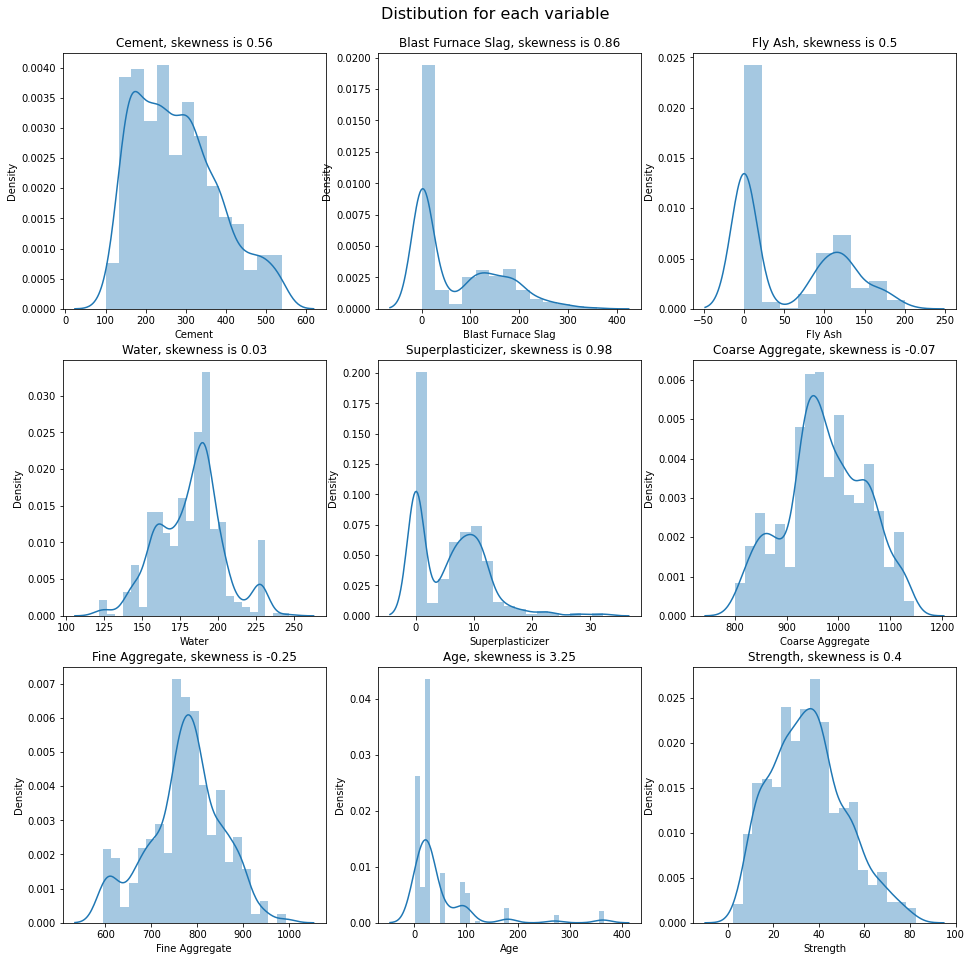

In [8]:
#  Getting known with the kind of distrubutions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=0.92, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
dist_custom(dataset=df, columns_list=df.columns, rows=3, cols=3, suptitle='Distibution for each variable')

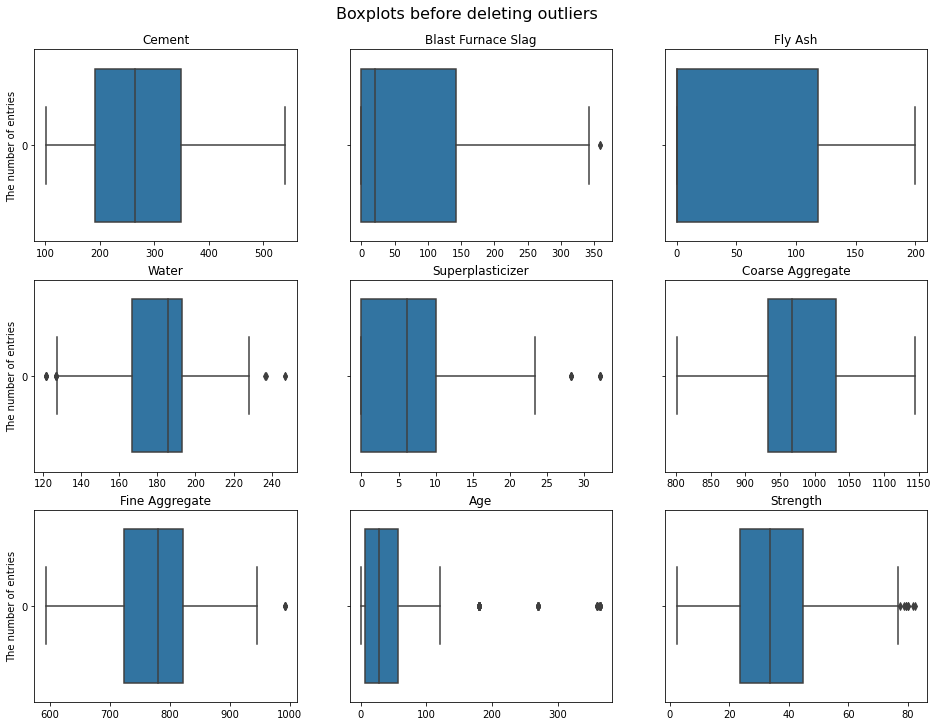

In [9]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=df.columns, rows=3, cols=3, suptitle='Boxplots before deleting outliers')

In [10]:
# deleting outliers
# For Skewed distributions we'll use Inter-Quartile Range (IQR) proximity rule.
Q1 = df[df.columns].quantile(0.25)
Q3 = df[df.columns].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df_filtered = df[~((df[df.columns] < (Q1 - 1.5 * IQR)) |(df[df.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df_filtered.shape)

Here we will get IQR for each column
 Cement                158.30
Blast Furnace Slag    142.50
Fly Ash               118.30
Water                  26.30
Superplasticizer       10.00
Coarse Aggregate       99.00
Fine Aggregate         97.90
Age                    49.00
Strength               21.35
dtype: float64


(911, 9)

In [11]:
df_filtered

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


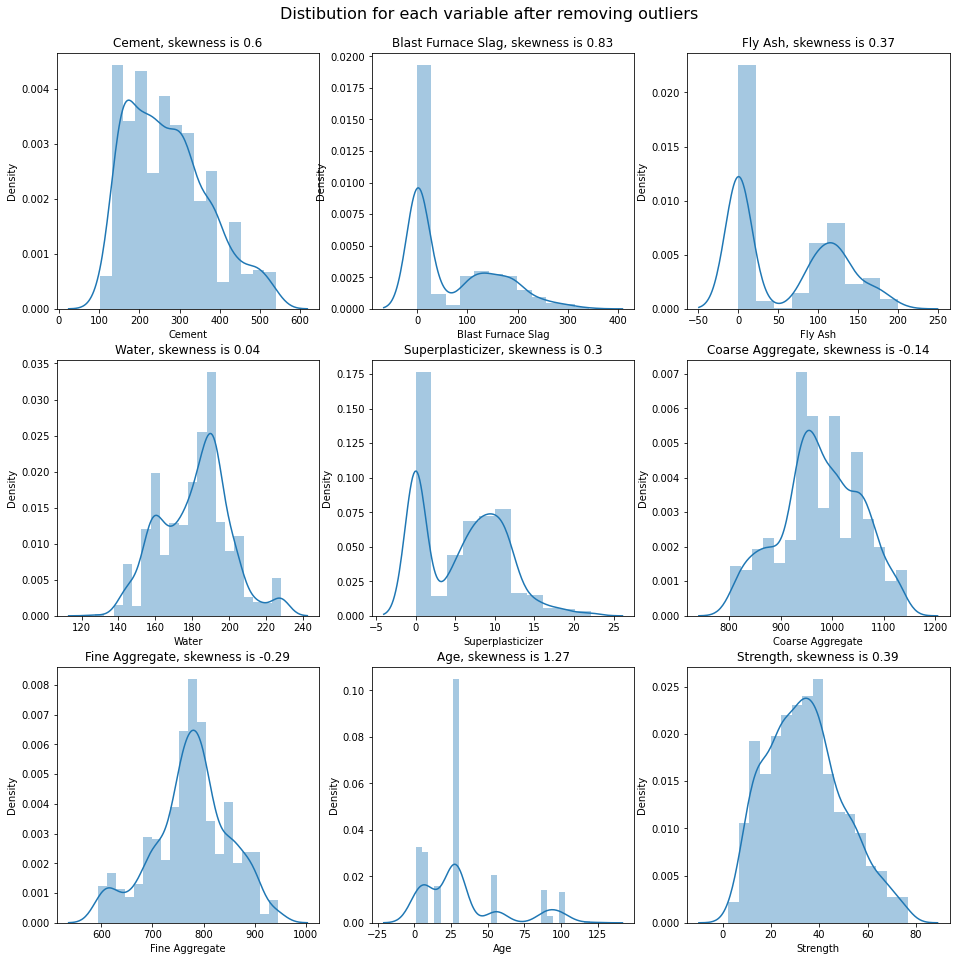

In [12]:
dist_custom(dataset=df_filtered, columns_list=df.columns, rows=3, cols=3, suptitle='Distibution for each variable after removing outliers')

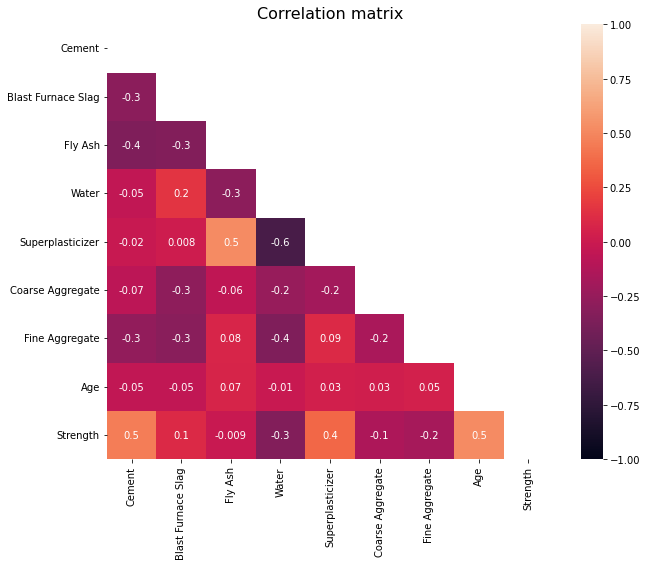

In [13]:
# calculating the correlation matrix
corr = df_filtered.corr()
matrix = np.triu(corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)

plt.title('Correlation matrix', size=16)
plt.show()

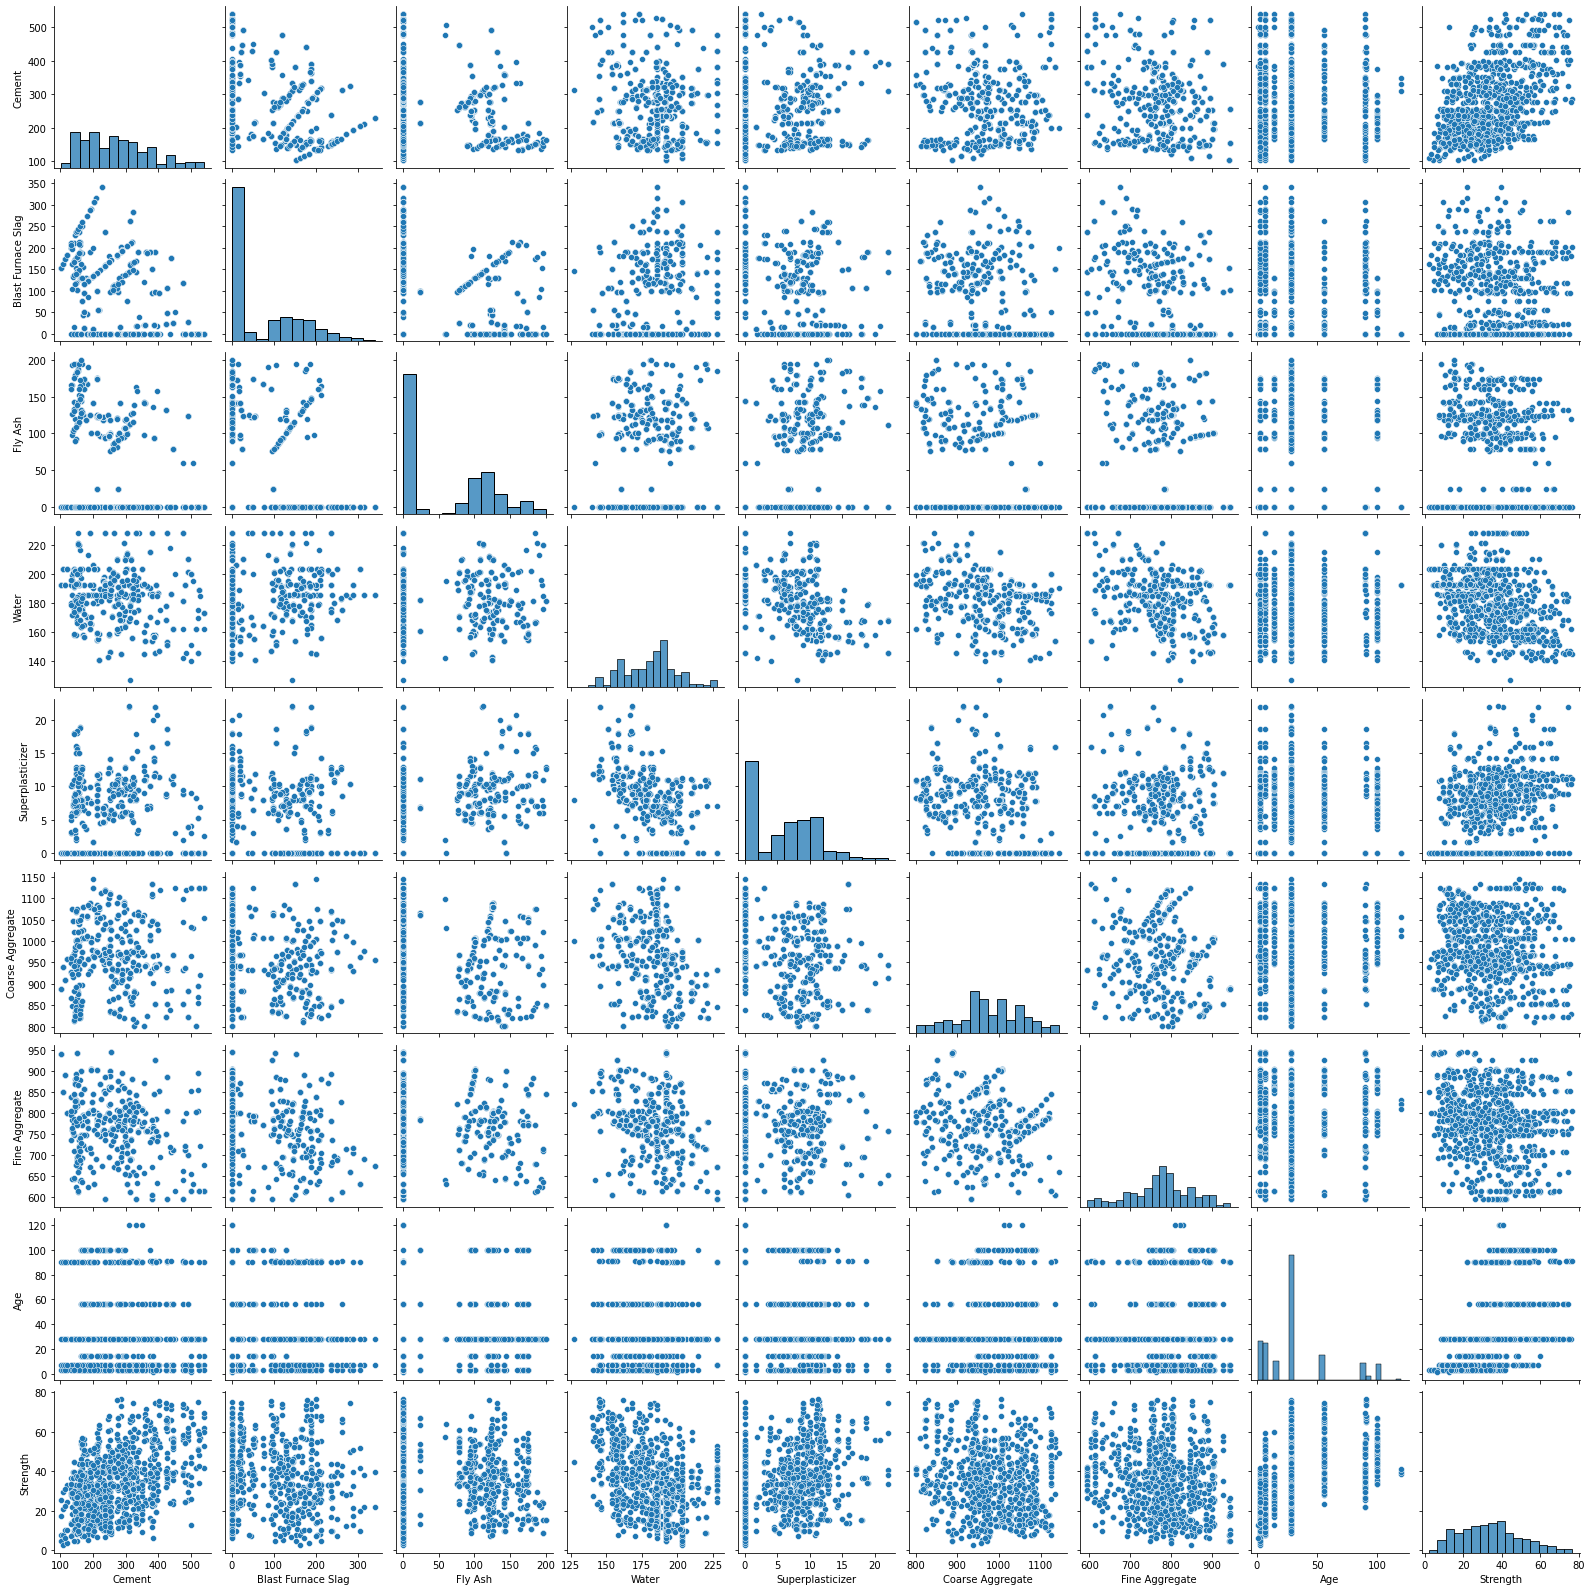

In [14]:
sns.pairplot(data=df_filtered,diag_kind="hist")

In [15]:
df_filtered.to_csv("Filtered_dataset.csv")